In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pyRTC.utils as utils
from pyRTC import *

In [2]:
shm_names = ["wfs", "wfsRaw", "wfc", "wfc2D", "signal", "signal2D", "psfShort", "psfLong"] #list of SHMs to reset
clear_shms(shm_names)

Traceback (most recent call last):
  File "/Users/ellenlee/opt/anaconda3-arm64/envs/pyrtc/lib/python3.9/multiprocessing/resource_tracker.py", line 201, in main
    cache[rtype].remove(name)
KeyError: '/wfs'
Traceback (most recent call last):
  File "/Users/ellenlee/opt/anaconda3-arm64/envs/pyrtc/lib/python3.9/multiprocessing/resource_tracker.py", line 201, in main
    cache[rtype].remove(name)
KeyError: '/wfs_meta'
Traceback (most recent call last):
  File "/Users/ellenlee/opt/anaconda3-arm64/envs/pyrtc/lib/python3.9/multiprocessing/resource_tracker.py", line 201, in main
    cache[rtype].remove(name)
KeyError: '/wfs_gpu_handle'
Traceback (most recent call last):
  File "/Users/ellenlee/opt/anaconda3-arm64/envs/pyrtc/lib/python3.9/multiprocessing/resource_tracker.py", line 201, in main
    cache[rtype].remove(name)
KeyError: '/wfsRaw'
Traceback (most recent call last):
  File "/Users/ellenlee/opt/anaconda3-arm64/envs/pyrtc/lib/python3.9/multiprocessing/resource_tracker.py", line 201, i

## Init hardware

In [2]:
conf = utils.read_yaml_file("config_felixsim.yaml")
wfs_conf = conf["wfs"]
slopes_conf = conf["slopes"]
dm_conf = conf["wfc"]

In [3]:
slopes = SlopesProcess(conf=slopes_conf)
wfs = FELIXSimulator(wfs_conf)

In [4]:
wfs.start()
slopes.start()

In [5]:
dm = IRTFASMSimulator(dm_conf, wfs)

In [6]:
dm.start()
dm.flatten()

In [7]:
loop_conf = conf["loop"]
loop = Loop(loop_conf)
loop.start()

## Run simulation

In [58]:
loop.numItersIM = 200
loop.pokeAmp = 0.3

In [59]:
loop.computeIM()

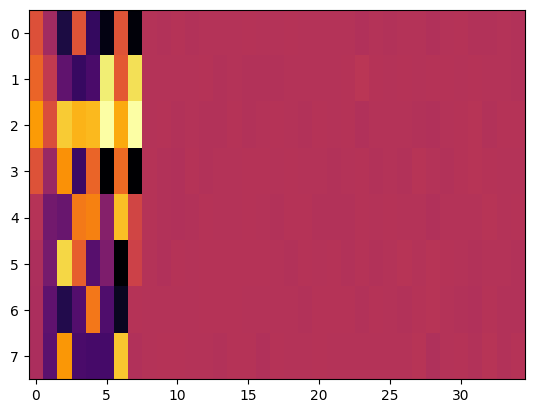

In [60]:
loop.plotIM()

In [8]:
loop.loadIM()

In [139]:
loop.setGain(0.1)
loop.leakyGain = 0.05

In [145]:
loop.start()

In [8]:
loop.stop()

In [16]:
wfs.amplitude = 30

In [13]:
wfs.detectorNoise = 10

In [17]:
wfs.slopeNoise = 0

In [34]:
coeffs = np.zeros(35)
coeffs[6] = 0
dm.write(coeffs)
dm.sendToHardware()

In [18]:
coeffs = np.random.normal(0, 0.2, 35)
coeffs[7:] = 0
dm.write(coeffs)
dm.sendToHardware()

In [40]:
dm.flatten()

In [47]:
slopes.refSlopes *= 0

In [54]:
slopes.takeRefSlopes()

In [55]:
slopes.saveRefSlopes()

In [56]:
slopes.loadRefSlopes()

Convert modal imat to cmds

In [45]:
imat = fits.getdata("calib/slopesXandY.fits")
imat = imat.reshape(35,8).T

In [46]:
z2a = np.load("calib/m2a_zernike.npy")
a2z = np.linalg.pinv(z2a)

In [47]:
imat_cmds = imat @ a2z

In [48]:
np.save("calib/felix_theor_imat_cmds.npy", imat_cmds)

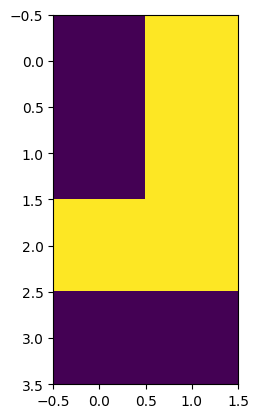

In [13]:
plt.figure()
plt.imshow(imat[:,2].reshape(4,2))

In [53]:
masks = np.load("calib/subaps2x2_64pix.npy")

In [39]:
masks_new = masks.copy()
masks_new[1] = masks[3]
masks_new[2] = masks[1]
masks_new[3] = masks[2]

In [40]:
np.save("calib/subaps2x2_32pix.npy", masks_new)

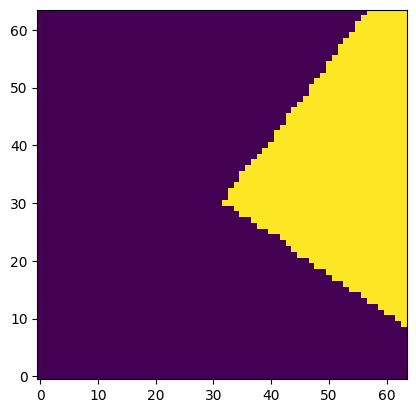

In [57]:
plt.figure()
plt.imshow(masks[3], origin="lower")

In [39]:
imat = np.load("calib/im_felix_theor_zern7.npy")
print(imat)

[[ 2.          0.         -3.46410162 -2.44948974 -2.44948974  4.24264069
   2.82842712]
 [ 2.          0.         -3.46410162 -2.44948974 -2.44948974  4.24264069
   2.82842712]
 [ 2.          0.          3.46410162  2.44948974  2.44948974  4.24264069
   2.82842712]
 [ 2.          0.          3.46410162 -2.44948974  2.44948974 -4.24264069
   2.82842712]
 [ 0.          2.         -3.46410162 -2.44948974  2.44948974  2.82842712
   4.24264069]
 [ 0.          2.         -3.46410162 -2.44948974  2.44948974  2.82842712
   4.24264069]
 [ 0.          2.          3.46410162  2.44948974 -2.44948974  2.82842712
   4.24264069]
 [ 0.          2.         -3.46410162  2.44948974  2.44948974  2.82842712
  -4.24264069]]


In [25]:
from astropy.io import fits

In [40]:
imat = fits.getdata("/Users/ellenlee/Documents/IRTF-ZernikeServer/data/slopesXandY.fits")
imat = imat.reshape((7,8)).T

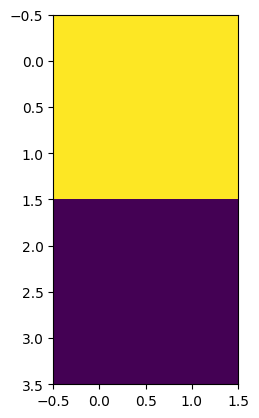

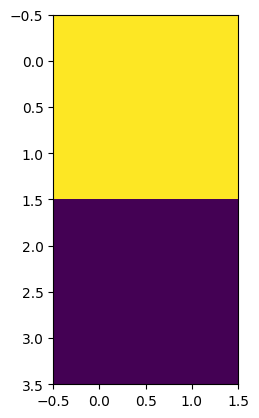

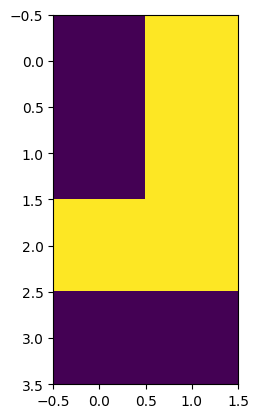

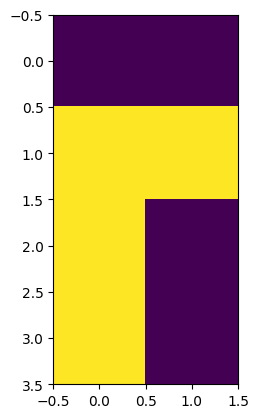

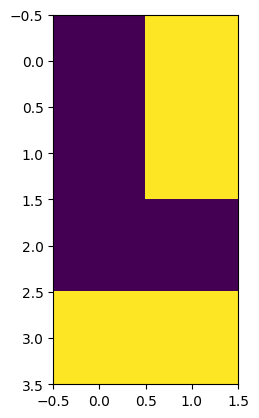

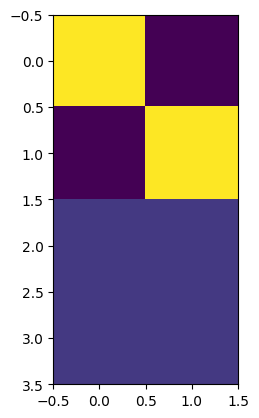

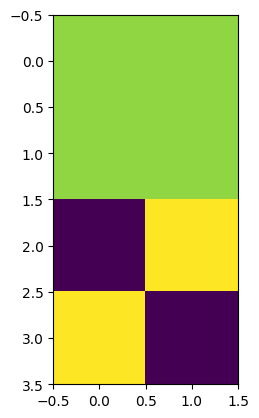

In [41]:
for i in range(7):
    plt.figure()
    plt.imshow(imat[:,i].reshape(4,2))